In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# Generate a graph and get the Adjacency matrix

In [4]:
V = 5
p = 0.2
G = nx.DiGraph()
A = np.asarray([[0,0,1,0,1],
                [1,0,0,0,1],
                [0,1,0,0,1],
                [1,0,1,0,1],
                [0,0,0,0,1]])
G = nx.from_numpy_array(A= A, create_using=G)

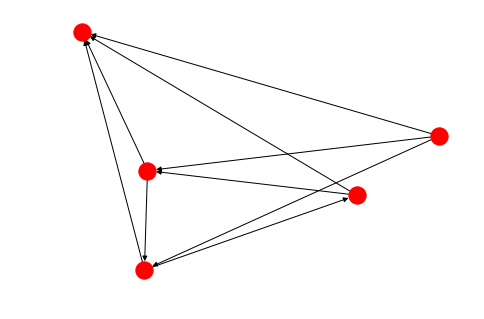

In [5]:
nx.draw(G)

In [6]:
A = nx.to_numpy_array(G)

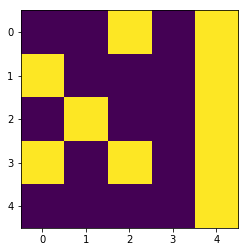

In [7]:
plt.imshow(A)

# PageRank
### Notation
Let $A$ be the adjacency matrix of a graph G, if $A_{i,j} = 1$, then it means that $\exists$ an edge from node $i$ to node $j$

let $X$ be the ranks of the nodes, $X_i$ denotes the rank of the i-th node, the initial rank is $X_i = 1/|V|, \quad \forall i$.

$A = \begin{bmatrix}
    0 & 1 & 0 & 1 \\
    0 & 0 & 1 & 0 \\
    1 & 0 & 0 & 1 \\
    0 & 0 & 0 & 0
\end{bmatrix}, \quad
X = \begin{bmatrix}
    r_1 \\
    r_2 \\
    r_3 \\
    r_4
\end{bmatrix}
$


+ the $i$-th entry of $A\cdot X$ is simply the sum of the ranks of the nodes towards which node $i$ points

$A\cdot X = \begin{bmatrix}
    r_2 + r_4 \\
    r_3 \\
    r_1 + r_4 \\
    0
\end{bmatrix}$

+ the $i$-th entry of $A^T\cdot X$ is simply the sum of the ranks of the nodes that point towards node $i$

$A^T\cdot X = \begin{bmatrix}
    r_3 \\
    r_1 \\
    r_2 \\
    r_1 + r_3
\end{bmatrix}$

+ Similarly the $i$-th entry of $A\cdot \mathbf{1}$ is simply the out-degree of node $i$.

+ And the $i$-th entry of $A^T\cdot \mathbf{1}$ is simply the in-degree of node $i$.

### Algorithm

__Initialization__: $X \leftarrow \mathbf{1} / |V|$

__Normalize A__: 

$D  = I\times A\cdot \mathbf{1}$

$A' = D^{-1}\cdot A$

__Repeat $t$ times__: $X\leftarrow (1-d)\times X + d\times A'^T\cdot X$

In [8]:
def plot_ranks(G,X):
    plt.figure()
    nodes_labels = {i:"%.2f" %rank for i,rank in enumerate(X)}
    nx.draw(G,
            labels=nodes_labels,
            alpha=0.8)


## Initialization

In [9]:
X = 1/V * np.ones(V)

## Normalize A

In [10]:
D = np.eye(V)*A.dot(np.ones(V))
A_ = (np.linalg.inv(D)).dot(A)
A_

array([[0.        , 0.        , 0.5       , 0.        , 0.5       ],
       [0.5       , 0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.5       , 0.        , 0.        , 0.5       ],
       [0.33333333, 0.        , 0.33333333, 0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

## Execution

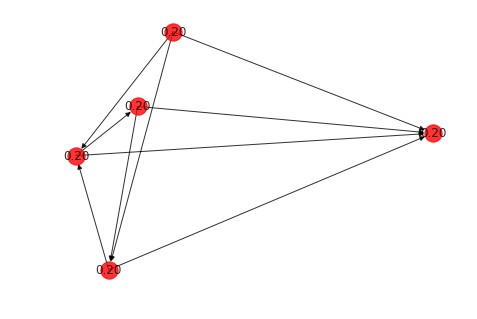

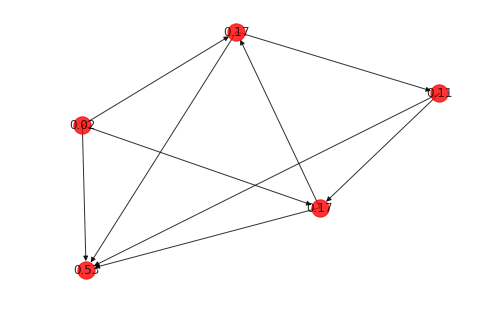

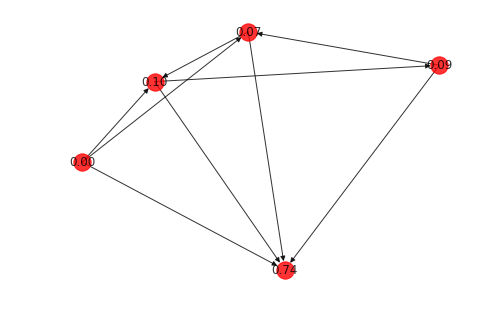

In [11]:
ranks = [X]
d = 0.9
for i in range(3):
    plot_ranks(G,X)
    X = (1-d)*X + d*A_.T.dot(X)
    ranks.append(X[:])

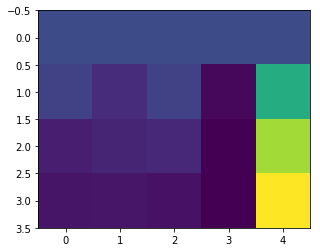

In [12]:
plt.imshow(np.asarray(ranks))